Assignment 2 : Interacting with Web APIs<br>
Problem Statement: Analyzing Weather Data from OpenWeatherMap API<br>
Dataset: Weather data retrieved from OpenWeatherMap API<br>
Description: The goal is to interact with the OpenWeatherMap API to retrieve weather data for a specific location and perform data modeling and visualization to analyze weather patterns over time.<br>
Tasks to Perform:

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for a specific location.

In [3]:
api_key = "539abd34ea726546401f7e455033f7a2"  
city = "Pune"
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"

response = requests.get(url)
weather_data = response.json()

print(weather_data)   

{'coord': {'lon': 73.8553, 'lat': 18.5196}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.81, 'feels_like': 29.94, 'temp_min': 27.81, 'temp_max': 27.81, 'pressure': 1008, 'humidity': 67, 'sea_level': 1008, 'grnd_level': 936}, 'visibility': 10000, 'wind': {'speed': 4.8, 'deg': 284, 'gust': 5.03}, 'clouds': {'all': 100}, 'dt': 1728038528, 'sys': {'country': 'IN', 'sunrise': 1728003335, 'sunset': 1728046243}, 'timezone': 19800, 'id': 1259229, 'name': 'Pune', 'cod': 200}


3. Extract relevant weather attributes such as temperature, humidity, wind speed, and precipitation from the API response.

In [4]:
temperature = weather_data['main']['temp']
humidity = weather_data['main']['humidity']
wind_speed = weather_data['wind']['speed']

print(f"Temperature: {temperature} kelvin, \nHumidity: {humidity}%, \nWind Speed: {wind_speed} m/s")

Temperature: 27.81 kelvin, 
Humidity: 67%, 
Wind Speed: 4.8 m/s


4. Clean and preprocess the retrieved data, handling missing values or inconsistent formats.

In [5]:
data = {
    'temperature': [temperature],
    'humidity': [humidity],
    'wind_speed': [wind_speed], 
}

df = pd.DataFrame(data)
print(df)

   temperature  humidity  wind_speed
0        27.81        67         4.8


In [6]:
# Handle missing values
df.fillna(method='ffill', inplace=True)

5. Perform data modeling to analyze weather patterns, such as calculating average temperature, maximum/minimum values, or trends over time.

In [7]:
# Calculate average, max, and min
avg_temp = df['temperature'].mean()
max_temp = df['temperature'].max()
min_temp = df['temperature'].min()
avg_humd = df['humidity'].mean()
avg_wind = df['wind_speed'].mean()

print(f"Average Temperature: {avg_temp} C, \nMax Temperature: {max_temp} C, \nMin Temperature: {min_temp} C, \nAverage Humidity: {avg_humd} %, \nAverage Wind Speed: {avg_wind} m/s")

Average Temperature: 27.81 C, 
Max Temperature: 27.81 C, 
Min Temperature: 27.81 C, 
Average Humidity: 67.0 %, 
Average Wind Speed: 4.8 m/s


6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or scatter plots, to represent temperature changes, precipitation levels, or wind speed variations.

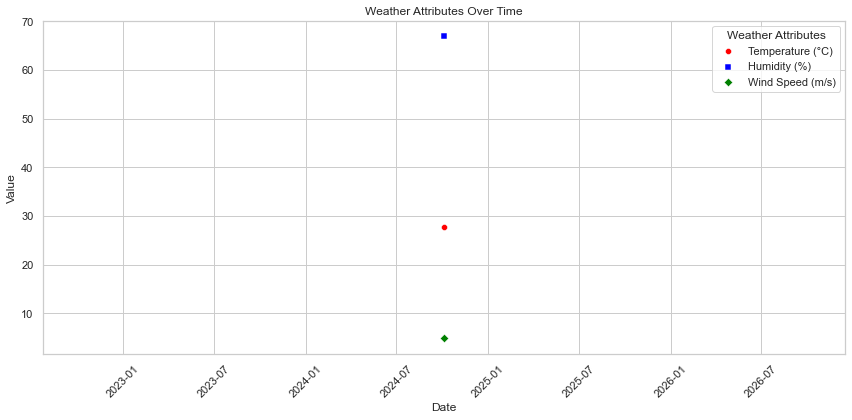

In [8]:
df['date'] = pd.to_datetime(weather_data['dt'], unit='s')  
# Set the style for the plot
sns.set(style="whitegrid")

# Create the combined scatter plot
plt.figure(figsize=(12, 6))

# Plot Temperature (in Celsius)
sns.scatterplot(data=df, x='date', y='temperature', color='red', label='Temperature (°C)', marker='o')
# Plot Humidity
sns.scatterplot(data=df, x='date', y='humidity', color='blue', label='Humidity (%)', marker='s')
# Plot Wind Speed
sns.scatterplot(data=df, x='date', y='wind_speed', color='green', label='Wind Speed (m/s)', marker='D')

# Formatting the plot
plt.title('Weather Attributes Over Time')
plt.ylabel('Value')
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Weather Attributes')
plt.tight_layout()  # Adjust the layout to fit labels

# Show the plot
plt.show()


7. Apply data aggregation techniques to summarize weather statistics by specific time periods (e.g., daily, monthly, seasonal).

In [9]:
# Ensure 'date' is in the datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# Daily aggregation
daily_summary = df.resample('D').agg({
    'temperature': ['mean', 'max', 'min'],
    'humidity': 'mean',
    'wind_speed': 'mean'
}).rename(columns={
    'mean': 'Average',
    'max': 'Maximum',
    'min': 'Minimum'
})

print("Daily Summary:")
print(daily_summary)

# Monthly aggregation
monthly_summary = df.resample('M').agg({
    'temperature': ['mean', 'max', 'min'],
    'humidity': 'mean',
    'wind_speed': 'mean'
}).rename(columns={
    'mean': 'Average',
    'max': 'Maximum',
    'min': 'Minimum'
})

print("\nMonthly Summary:")
print(monthly_summary)

# Seasonal aggregation (assuming four seasons: Spring, Summer, Fall, Winter)
# This can be done manually based on the month
# Creating a new column to indicate the season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df.index.month.map(get_season)

# Seasonal aggregation
seasonal_summary = df.groupby('season').agg({
    'temperature': ['mean', 'max', 'min'],
    'humidity': 'mean',
    'wind_speed': 'mean'
}).rename(columns={
    'mean': 'Average',
    'max': 'Maximum',
    'min': 'Minimum'
})

print("\nSeasonal Summary:")
print(seasonal_summary)


Daily Summary:
           temperature                 humidity wind_speed
               Average Maximum Minimum  Average    Average
date                                                      
2024-10-04       27.81   27.81   27.81     67.0        4.8

Monthly Summary:
           temperature                 humidity wind_speed
               Average Maximum Minimum  Average    Average
date                                                      
2024-10-31       27.81   27.81   27.81     67.0        4.8

Seasonal Summary:
       temperature                 humidity wind_speed
           Average Maximum Minimum  Average    Average
season                                                
Fall         27.81   27.81   27.81     67.0        4.8


8. Incorporate geographical information, if available, to create maps or geospatial visualizations representing weather patterns across different locations.

In [10]:
# Sample geographical data for multiple cities
data = {
    'city': ['Pune', 'Mumbai', 'Delhi', 'Bangalore'],
    'latitude': [18.5204, 19.0760, 28.6139, 12.9716],
    'longitude': [73.8567, 72.8777, 77.2090, 77.5946],
    'temperature': [30, 32, 28, 29],  # Sample temperature data
    'humidity': [70, 75, 65, 80],  # Sample humidity data
}

# Create a DataFrame
df_geo = pd.DataFrame(data)

# Create a base map
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)  # Centered in India

# Add a marker for each city with temperature data
for index, row in df_geo.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=row['temperature'] * 0.2,  # Scale the radius based on temperature
        color='red' if row['temperature'] > 30 else 'blue',  # Color based on temperature
        fill=True,
        fill_color='red' if row['temperature'] > 30 else 'blue',
        fill_opacity=0.6,
        popup=f"{row['city']}: {row['temperature']} °C, {row['humidity']}%",
    ).add_to(m)

# Show the map
m.save('weather_map.html')  # Save the map to an HTML file
m  # Display the map if in a Jupyter Notebook


9. Explore and visualize relationships between weather attributes, such as temperature and humidity, using correlation plots or heatmaps.

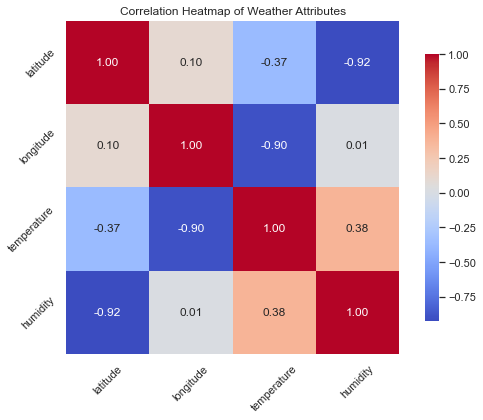

In [11]:
# Create a DataFrame for visualization
df_weather = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df_weather.corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={'shrink': .8})

# Add titles and labels
plt.title('Correlation Heatmap of Weather Attributes')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjust layout for better readability

# Show the plot
plt.show()